<a href="https://colab.research.google.com/github/UtsaChattopadhyay/ChessMoves/blob/master/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

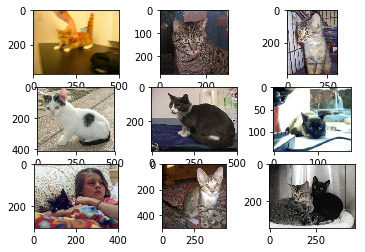

In [0]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'C:\\Users\\Lenovo\\OneDrive\\Documents\\foss\\train\\'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [0]:
import tensorflow as tf

In [0]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'C:\\Users\\Lenovo\\OneDrive\\Documents\\foss\\train\\'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

Using TensorFlow backend.


KeyboardInterrupt: 

In [0]:
from numpy import load
photos = load('dogs_vs_cats_photos.npy')
labels = load('dogs_vs_cats_labels.npy')
print(photos.shape, labels.shape)

In [0]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'C:\\Users\\Lenovo\\OneDrive\\Documents\\dataset_dogs_vs_cats\\'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'C:\\Users\\Lenovo\\OneDrive\\Documents\\foss\\train\\'
for file in listdir(src_directory):
	src = src_directory + '\\' + file
	dst_dir = 'train\\'
	if random() < val_ratio:
		dst_dir = 'test\\'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats\\'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs\\'  + file
		copyfile(src, dst)

In [0]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
model = define_model()

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [0]:
train_it = datagen.flow_from_directory('C:\\Users\\Lenovo\\OneDrive\\Documents\\dataset_dogs_vs_cats\\train\\',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('C:\\Users\\Lenovo\\OneDrive\\Documents\\dataset_dogs_vs_cats\\test\\',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=20)

Epoch 1/20
293/293 [==============================] - 935s 3s/step - loss: 0.6798 - acc: 0.5752 - val_loss: 0.6502 - val_acc: 0.6091
Epoch 2/20
293/293 [==============================] - 834s 3s/step - loss: 0.6262 - acc: 0.6413 - val_loss: 0.6063 - val_acc: 0.6679
Epoch 3/20
293/293 [==============================] - 817s 3s/step - loss: 0.5865 - acc: 0.6865 - val_loss: 0.5705 - val_acc: 0.6982
Epoch 4/20
293/293 [==============================] - 942s 3s/step - loss: 0.5512 - acc: 0.7174 - val_loss: 0.5650 - val_acc: 0.7003
Epoch 5/20
293/293 [==============================] - 1051s 4s/step - loss: 0.5169 - acc: 0.7467 - val_loss: 0.5367 - val_acc: 0.7273
Epoch 6/20
293/293 [==============================] - 992s 3s/step - loss: 0.4989 - acc: 0.7565 - val_loss: 0.5099 - val_acc: 0.7398
Epoch 7/20
293/293 [==============================] - 990s 3s/step - loss: 0.4731 - acc: 0.7741 - val_loss: 0.4858 - val_acc: 0.7611
Epoch 8/20
293/293 [==============================] - 992s 3s/step -

In [0]:
_,acc = model.evaluate_generator(test_it, steps=len(test_it),verbose=1)


99/99 [==============================] - 133s 1s/step


In [0]:
len(train_it)

293

In [0]:
print('> %.3f' ,(acc * 100.0))

> %.3f 78.83547517433632


https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb